In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt

In [2]:
#importando dados
dataset = pd.read_csv("./data/Churn.csv", sep=";")
#visualizando
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,741,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
#formato
dataset.shape

(999, 12)

In [4]:
#renomear as colunas
dataset.columns = ["ID", "Score", "State", "Gender", "Age", "Patrimony", "Balance", "Products", "CreditCard", "Active",
                   "Salary", "Out"]

In [5]:
#visualize
dataset.head()

,ID,Score,State,Gender,Age,Patrimony,Balance,Products,CreditCard,Active,Salary,Out
0,1,741,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


<Axes: xlabel='State'>

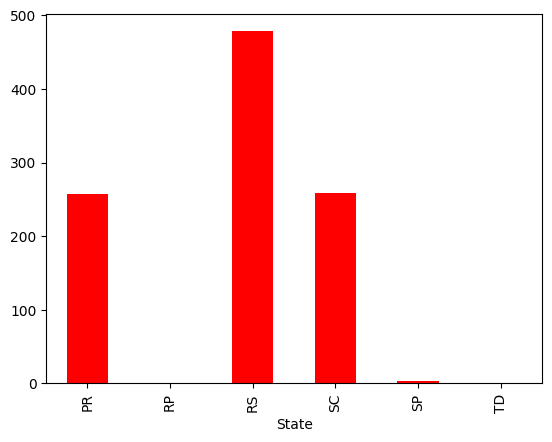

In [7]:
#explorar dados categóricos
#State
grouped = dataset.groupby(['State']).size()
grouped
grouped.plot.bar(color='red')

<Axes: xlabel='Gender'>

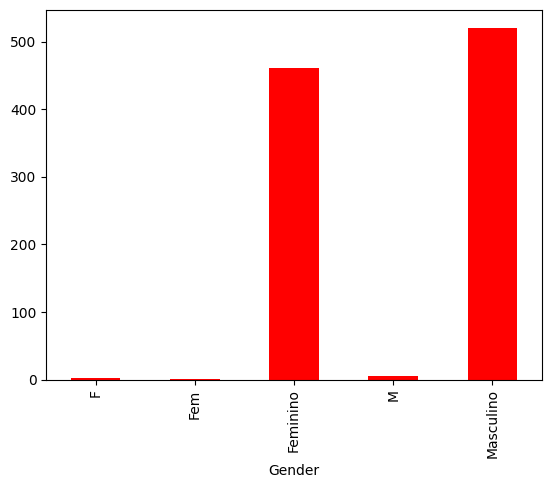

In [8]:
#gender
grouped = dataset.groupby(['Gender']).size()
grouped
grouped.plot.bar(color='red')

In [9]:
#explorar colunas numericas 
#score
dataset['Score'].describe()

count    999.000000
mean     648.743744
std       98.303171
min      376.000000
25%      580.000000
50%      654.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

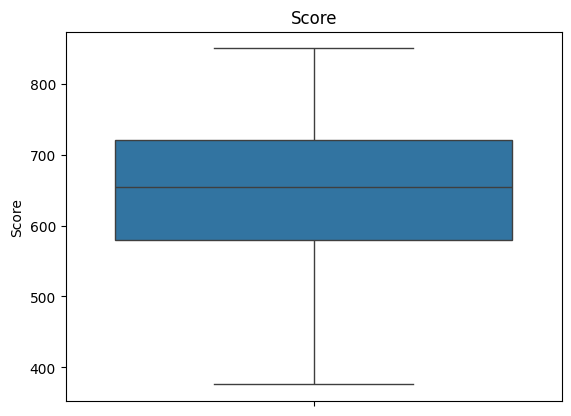

In [10]:
srn.boxplot(dataset['Score']).set_title('Score')

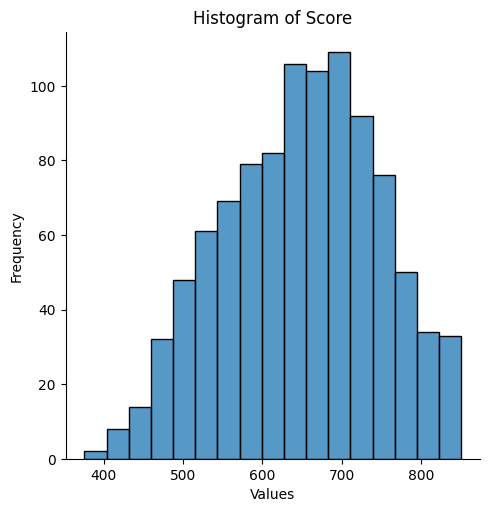

In [11]:
srn.displot(dataset['Score'], kde=False)  # kde=False disables the kernel density estimate
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Score')
plt.show()

In [12]:
#Age 
dataset['Age'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age')

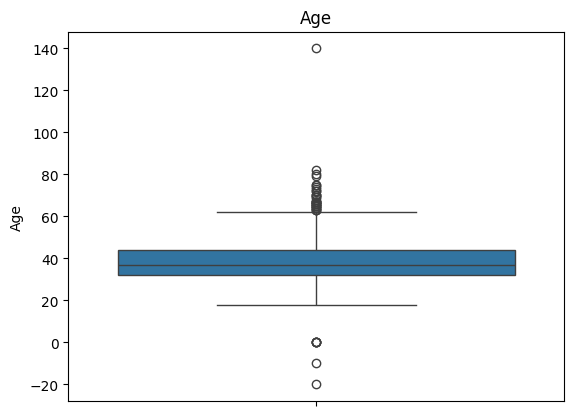

In [13]:
srn.boxplot(dataset['Age']).set_title('Age')

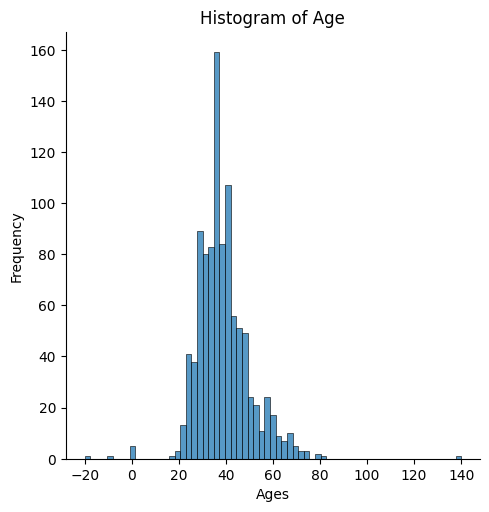

In [14]:
srn.displot(dataset['Age'], kde=False)  
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [15]:
#balance
dataset['Balance'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Balance, dtype: float64

Text(0.5, 1.0, 'Balance')

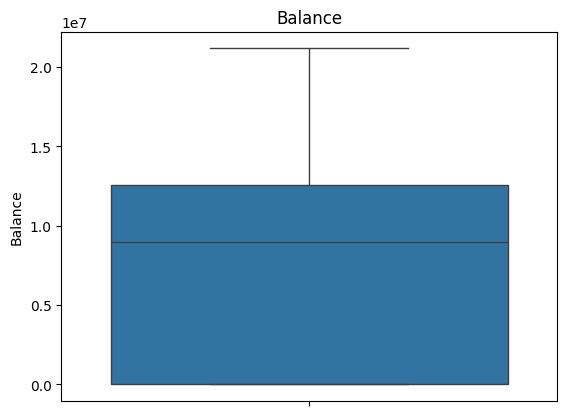

In [16]:
srn.boxplot(dataset['Balance']).set_title('Balance')

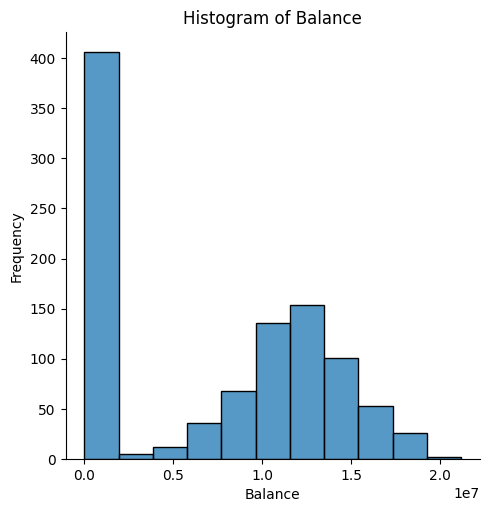

In [17]:
srn.displot(dataset['Balance'], kde=False)  
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance')
plt.show()

In [18]:
#salary
dataset['Salary'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Salary')

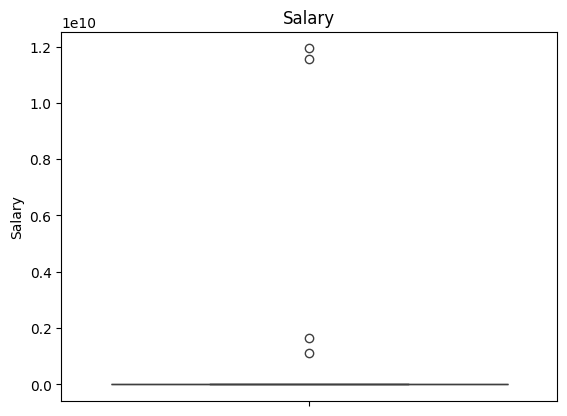

In [19]:
srn.boxplot(dataset['Salary']).set_title('Salary')

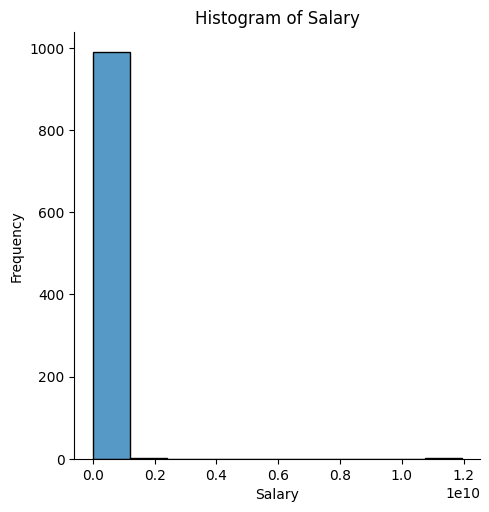

In [20]:
srn.displot(dataset['Salary'], kde=False, bins=10)  
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Salary')
plt.show()

In [22]:
#contrar valores nulos
#gender e salary
dataset.isnull().sum()

ID            0
Score         0
State         0
Gender        8
Age           0
Patrimony     0
Balance       0
Products      0
CreditCard    0
Active        0
Salary        7
Out           0
dtype: int64

In [23]:
#salary
# remover e recolocar com a mediana
dataset['Salary'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salary, dtype: float64

In [24]:
median =  sts.median(dataset['Salary'])
median

70518.0

In [25]:
#substituir
dataset['Salary'].fillna(median, inplace = True)
#verificar se os valores NA foram substituidos
dataset['Salary'].isnull().sum()

0

In [26]:
#Gender - falta de padrão e valores NA
grouped = dataset.groupby(['Gender']).size()
grouped


Gender
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [27]:
#total NA
dataset['Gender'].isnull().sum()

8

In [29]:
#completar na com Masculino
dataset['Gender'].fillna('Masculino', inplace=True)
#verificando valores NA
dataset['Gender'].isnull().sum()

0

In [30]:
#padroniza de acordo com o domínio
dataset.loc[dataset['Gender'] == 'Masculino', 'Gender'] = "M"
dataset.loc[dataset['Gender'].isin(['Feminino','Fem']), 'Gender'] = 'F'
#visualizar o resultado
grouped = dataset.groupby(['Gender']).size()
grouped

Gender
F    464
M    535
dtype: int64

In [31]:
#Age fora do dominio
dataset["Age"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Age, dtype: float64

In [32]:
#visualizar
dataset.loc[(dataset['Age'] < 0) | (dataset['Age'] > 120)]

,ID,Score,State,Gender,Age,Patrimony,Balance,Products,CreditCard,Active,Salary,Out
867,869,636,RS,F,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,M,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,M,140,5,93147,2,1,0,6621413.0,0


In [33]:
#calcular a mediana
median = sts.median(dataset['Age'])
median

37

In [34]:
#substitui
dataset.loc[(dataset['Age'] < 0) | (dataset['Age'] > 120), 'Age'] = median

In [35]:
#verificar se ainda existe valores fora do dominio
dataset.loc[(dataset['Age'] < 0) | (dataset['Age'] > 120)]

,ID,Score,State,Gender,Age,Patrimony,Balance,Products,CreditCard,Active,Salary,Out


In [36]:
#dados duplicados, buscando pelo ID
dataset[dataset.duplicated(['ID'],keep = False)]

,ID,Score,State,Gender,Age,Patrimony,Balance,Products,CreditCard,Active,Salary,Out
80,81,665,RS,F,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,F,34,1,9664554,2,0,0,17141366.0,0


In [37]:
#excuir pelo ID
dataset.drop_duplicates(subset='ID', keep = 'first', inplace=True)
#procurar duplicados
dataset[dataset.duplicated(['ID'], keep=False)]

,ID,Score,State,Gender,Age,Patrimony,Balance,Products,CreditCard,Active,Salary,Out


In [38]:
#States fora do dominio
grouped = dataset.groupby(['State']).size()
grouped

State
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [39]:
#atribuir RS (moda)
dataset.loc[dataset['State'].isin(['RP', 'SP','TD']), 'State'] = 'RS'
#resultado
grouped = dataset.groupby(['State']).size()
grouped

State
PR    257
RS    483
SC    258
dtype: int64

In [40]:
#outliers em salary
sdev = sts.stdev(dataset["Salary"])
sdev

528988918.4679201

In [41]:
# definir padrão com 2 * desvio padrão
# verificando se algum bate com o padrão
dataset.loc[dataset['Salary'] >= 2 * sdev]

,ID,Score,State,Gender,Age,Patrimony,Balance,Products,CreditCard,Active,Salary,Out
7,8,376,PR,F,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,F,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,F,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,M,72,1,0,2,0,1,1.119812e+09,0


In [42]:
#atualiza esse padrão para a mediana
median = sts.median(dataset['Salary'])
median

8637195.5

In [43]:
dataset.loc[dataset['Salary'] >= 2*sdev, 'Salary'] = median
#verificando se algum bate com o critério
dataset.loc[dataset['Salary'] >= 2 * sdev]

,ID,Score,State,Gender,Age,Patrimony,Balance,Products,CreditCard,Active,Salary,Out


In [44]:
dataset.head()

,ID,Score,State,Gender,Age,Patrimony,Balance,Products,CreditCard,Active,Salary,Out
0,1,741,RS,F,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,F,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,F,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,F,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,F,43,2,12551082,1,1,1,790841.0,0


In [45]:
dataset.shape

(998, 12)